# Explore weather data

In [88]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
weather_data_file = '../data/weather_data/ny_jfk_weather.csv'

In [25]:
weather_data = pd.read_csv(weather_data_file, sep=',')
weather_data.head(10)

STATION                              NAME  LATITUDE  LONGITUDE  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
5  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
6  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
7  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
8  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   
9  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   40.6386   -73.7622   

   ELEVATION        DATE  AWND  PGTM  PRCP  SNOW  ...    WDF5  WSF2  WSF5  \
0        3.4  2017-07-01   5.5   NaN  13.5   0.0  ...   180.0  11.2  14.3   
1        3.4  2017-07-02   4.5   NaN   0.0   0.0  ...   180.0   8.9  11.2   
2        3.4  2017-07-03   3.5   NaN   0.0   0.0  ...   220.0   8.9  10.7   
3        3.4  2017-07-04   2.9   NaN   0.0   0.0  ...    30.0   7.2   8.5   
4        3.4  2017-07-05   4.0   NaN   0.0   0.0  ...   130.0   7.6   9.4   
5        3.4  2017-07-06   3.7   NaN   0.0   0.0  ...   110.0   6.3   7.6   
6        3.4  2017-07-07   4.0   NaN  48.8   0.0  ...   300.0  11.6  13.4   
7        3.4  2017-07-08   4.9   NaN   0.0   0.0  ...   260.0  10.7  12.5   
8        3.4  2017-07-09   5.1   NaN   0.0   0.0  ...   190.0   8.9  10.3   
9        3.4  2017-07-10   5.7   NaN   0.0   0.0  ...   180.0  12.5  15.2   

   WT01  WT02  WT03  WT04  WT06  WT08  WT09  
0   1.0   NaN   1.0   NaN   NaN   NaN   NaN  
1   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
7   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
8   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[10 rows x 25 columns]

In [29]:
weather_data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5',
       'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09'],
      dtype='object')

In [31]:
weather_data.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
                           'PGTM', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 
                           'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 
                           'WT08', 'WT09'], inplace=True)

In [32]:
weather_data.head(10)

DATE  AWND  PRCP  SNOW  SNWD  TAVG
0  2017-07-01   5.5  13.5   0.0   0.0  22.0
1  2017-07-02   4.5   0.0   0.0   0.0  25.2
2  2017-07-03   3.5   0.0   0.0   0.0  26.2
3  2017-07-04   2.9   0.0   0.0   0.0  25.1
4  2017-07-05   4.0   0.0   0.0   0.0  24.6
5  2017-07-06   3.7   0.0   0.0   0.0  22.6
6  2017-07-07   4.0  48.8   0.0   0.0  22.9
7  2017-07-08   4.9   0.0   0.0   0.0  24.9
8  2017-07-09   5.1   0.0   0.0   0.0  25.0
9  2017-07-10   5.7   0.0   0.0   0.0  23.7

### Graph weather over the sample period

Text(0.5,1,'Snow')

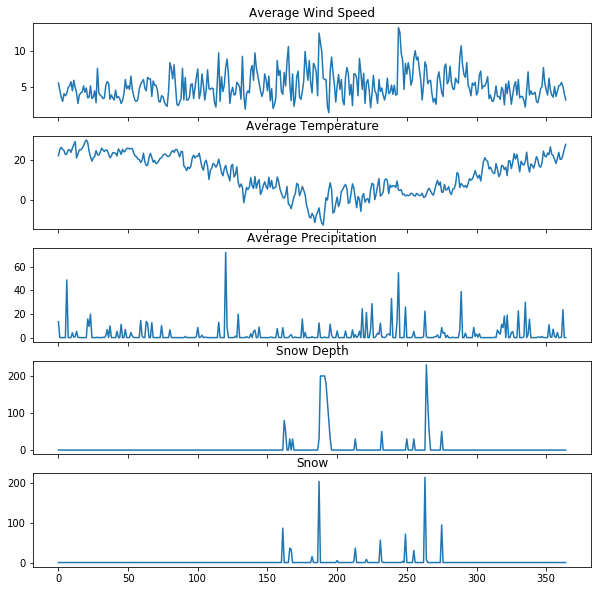

In [41]:
f, axarr = plt.subplots(5, sharex=True, figsize=(10, 10))
axarr[0].plot(weather_data.AWND)
axarr[0].set_title('Average Wind Speed')
axarr[1].plot(weather_data.TAVG)
axarr[1].set_title('Average Temperature')
axarr[2].plot(weather_data.PRCP)
axarr[2].set_title('Average Precipitation')
axarr[3].plot(weather_data.SNWD)
axarr[3].set_title('Snow Depth')
axarr[4].plot(weather_data.SNOW)
axarr[4].set_title('Snow')

### Create weather meta-data

In [55]:
months = []
for i, weather in weather_data.iterrows():
    month = str(datetime.strptime(weather.DATE, '%Y-%m-%d').strftime('%m'))
    months.append(month)
weather_data['month'] = months
weather_data.head(10)

DATE  AWND  PRCP  SNOW  SNWD  TAVG month
0  2017-07-01   5.5  13.5   0.0   0.0  22.0    07
1  2017-07-02   4.5   0.0   0.0   0.0  25.2    07
2  2017-07-03   3.5   0.0   0.0   0.0  26.2    07
3  2017-07-04   2.9   0.0   0.0   0.0  25.1    07
4  2017-07-05   4.0   0.0   0.0   0.0  24.6    07
5  2017-07-06   3.7   0.0   0.0   0.0  22.6    07
6  2017-07-07   4.0  48.8   0.0   0.0  22.9    07
7  2017-07-08   4.9   0.0   0.0   0.0  24.9    07
8  2017-07-09   5.1   0.0   0.0   0.0  25.0    07
9  2017-07-10   5.7   0.0   0.0   0.0  23.7    07

In [77]:
weather_meta = {}

In [86]:
for month in weather_data.month.unique():
    min_temp = weather_data[weather_data.month == month].TAVG.min()
    max_temp = weather_data[weather_data.month == month].TAVG.max()
    mean_temp = weather_data[weather_data.month == month].TAVG.mean()
    min_wind = weather_data[weather_data.month == month].AWND.min()
    max_wind = weather_data[weather_data.month == month].AWND.max()
    mean_wind = weather_data[weather_data.month == month].AWND.mean()
    min_prcp = weather_data[weather_data.month == month].PRCP.min()
    max_prcp = weather_data[weather_data.month == month].PRCP.max()
    mean_prcp = weather_data[weather_data.month == month].PRCP.mean()
    min_snwd = weather_data[weather_data.month == month].SNWD.min()
    max_snwd = weather_data[weather_data.month == month].SNWD.max()
    mean_snwd = weather_data[weather_data.month == month].SNWD.mean()
    min_snow = weather_data[weather_data.month == month].SNOW.min()
    max_snow = weather_data[weather_data.month == month].SNOW.max()
    mean_snow = weather_data[weather_data.month == month].SNOW.mean()
    weather_meta[month] = {
        'min_temp': min_temp,
        'max_temp': max_temp,
        'mean_temp': mean_temp,
        'min_wind': min_wind,
        'max_wind': max_wind,
        'mean_wind': mean_wind,
        'min_prcp': min_prcp,
        'max_prcp': max_prcp,
        'mean_prcp': mean_prcp,
        'min_snwd': min_snwd,
        'max_snwd': max_snwd,
        'mean_snwd': mean_snwd,
        'min_snow': min_snow,
        'max_snow': max_snow,
        'mean_snow': mean_snow
    }

# Save weather meta-data for later

In [89]:
pickle.dump(weather_meta, open('../data/weather_data/weather_meta.p', "wb"))